In [14]:
import sqlite3
conn = sqlite3.connect("carrs.sqlite3")
conn.row_factory = sqlite3.Row
c = conn.cursor()


In [12]:
!pip install matplotlib



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ამ ნაწილში გამოვიყენე fetchall() და დავფრინტე ისეთი მოდელები მანქანის როლის ცხენის ძალაც > 300 -ზე მეტია

In [2]:
hp = 300
def hp_of_car(hp):
    return c.execute("SELECT * FROM carrs WHERE Engine_HP >= ?", (hp,)).fetchall()
results = hp_of_car(hp)
for row in results:
    print(row['Make'],row['Model'])

BMW 1 Series M
BMW 1 Series
BMW 1 Series
BMW 1 Series
BMW 1 Series
BMW 1 Series
BMW 1 Series
BMW 1 Series
BMW 1 Series
BMW 2 Series
BMW 2 Series
BMW 2 Series
BMW 2 Series
BMW 2 Series
BMW 2 Series
BMW 2 Series
BMW 2 Series
BMW 3 Series Gran Turismo
BMW 3 Series Gran Turismo
BMW 3 Series Gran Turismo
BMW 3 Series
BMW 3 Series
BMW 3 Series
BMW 3 Series
BMW 3 Series
BMW 3 Series
BMW 3 Series
Mitsubishi 3000GT
Mitsubishi 3000GT
Mitsubishi 3000GT
Chrysler 300
Chrysler 300
Chrysler 300
Chrysler 300
Chrysler 300
Chrysler 300
Chrysler 300
Chrysler 300
Chrysler 300
Chrysler 300
Nissan 300ZX
Nissan 300ZX
Nissan 300ZX
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
Nissan 350Z
N

ამ შემთვევაში წერ მანქანის მოდელს მანქანას და ცხენის ძალას და შემდეგ ემატება მონაცემთა ბასაში ეს მონაცემი

In [7]:
conn = sqlite3.connect("carrs.sqlite3")
c = conn.cursor()

make = input('Enter the Make ' )
model = input('Enter the Model ' )
engine = float(input('Enter the Engine ' ))
c.execute("INSERT INTO carrs (Make, Model, Engine_HP) VALUES (?, ?, ?)", (make, model, engine))
conn.commit()       



Enter the Make  BMW
Enter the Model  G20
Enter the Engine  300


ამ ნაწილში კი ვანახლებთ ბაზასას შემდეგი პარამეტრების მიხედვით, მომხმარებელს შემოვაყვანინებთ მოდელს, მანქანას და რამდენი ცხენის ძალით უნდა რომ შეცვალოს

In [8]:
conn = sqlite3.connect("carrs.sqlite3")
c = conn.cursor()

print("შეიყვანეთ რა მანქანა და რომელი მოდელის გინდათ რომ შეუცვალოთ ცხენის ძალა")
make = input("შეიყვანეთ მანქანა ")
model = input('შეიყვანეთ მოდელი ')
hp = float(input("შეიყვანეთ ცხენის ძალა "))
c.execute(" UPDATE carrs SET Engine_HP = ? WHERE Make = ? AND model = ?",(hp,make,model))

conn.commit()
conn.close()


შეიყვანეთ რა მანქანა და რომელი მოდელის გინდათ რომ შეუცვალოთ ცხენის ძალა


შეიყვანეთ მანქანა  BMW
შეიყვანეთ მოდელი  1 Series M
შეიყვანეთ ცხენის ძალა  290


რაც შეეხება ამ ნაწილს აქ უბრალოდ არის წრიული დიაგრამა მანქანების ცილინდრების რაოდენობითა და გადაცემათა კოლოფით.

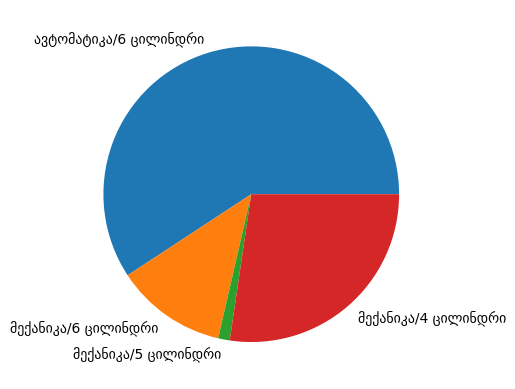

In [15]:
conn = sqlite3.connect("carrs.sqlite3")
c = conn.cursor()
import matplotlib.pyplot as plt


def cars_man_cylnd(transmiss,cylinders):
    return c.execute("SELECT count(*) FROM carrs WHERE Transmission_Type = ? AND Engine_Cylinders = ?",(transmiss,cylinders)).fetchone()[0]

automatic_6 = cars_man_cylnd("AUTOMATIC",6)
manual_6 = cars_man_cylnd("MANUAL",6)
manual_5 = cars_man_cylnd("MANUAL",5)
manual_4 = cars_man_cylnd("MANUAL",4)


labels = "ავტომატიკა/6 ცილინდრი","მექანიკა/6 ცილინდრი", "მექანიკა/5 ცილინდრი","მექანიკა/4 ცილინდრი"
sizes = [automatic_6,manual_6,manual_5,manual_4]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.show()

ამ ნაწილში კი მაქვს სვეტოვანი დიაგრამა ამავე მონაცემების

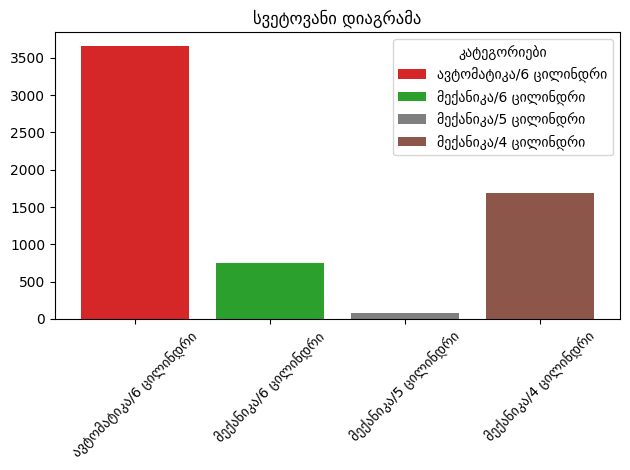

In [16]:
import matplotlib.pyplot as plt


def cars_man_cylnd(transmiss,cylinders):
    return c.execute("SELECT count(*) FROM carrs WHERE Transmission_Type = ? AND Engine_Cylinders = ?",(transmiss,cylinders)).fetchone()[0]

automatic_6 = cars_man_cylnd("AUTOMATIC",6)
manual_6 = cars_man_cylnd("MANUAL",6)
manual_5 = cars_man_cylnd("MANUAL",5)
manual_4 = cars_man_cylnd("MANUAL",4)


labels = ["ავტომატიკა/6 ცილინდრი", "მექანიკა/6 ცილინდრი", "მექანიკა/5 ცილინდრი", "მექანიკა/4 ცილინდრი"]
sizes = [automatic_6, manual_6, manual_5, manual_4]
bar_colors = ['tab:red', 'tab:green', 'tab:grey', 'tab:brown']


for i in range(len(labels)):
    plt.bar(labels[i], sizes[i], color=bar_colors[i], label=labels[i])

plt.title("სვეტოვანი დიაგრამა")
plt.xticks(rotation=45)
plt.legend(title='კატეგორიები')
plt.tight_layout()
plt.show()

ამ ნაწილში კი ჩამოთვლილია წლები 2010-2019-ის ჩათვლით და 4,6,8 ცილინდრიანი მანქანების გამოშვების რაოდენობა ამ წლებში.


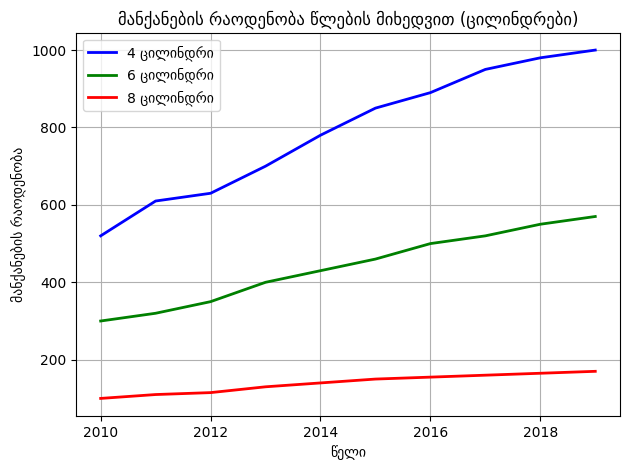

In [17]:
import matplotlib.pyplot as plt


years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


cyl_4 = [520, 610, 630, 700, 780, 850, 890, 950, 980, 1000]
cyl_6 = [300, 320, 350, 400, 430, 460, 500, 520, 550, 570]
cyl_8 = [100, 110, 115, 130, 140, 150, 155, 160, 165, 170]

plt.plot(years, cyl_4, label="4 ცილინდრი", color="blue", linewidth=2)
plt.plot(years, cyl_6, label="6 ცილინდრი", color="green", linewidth=2)
plt.plot(years, cyl_8, label="8 ცილინდრი", color="red", linewidth=2)


plt.title("მანქანების რაოდენობა წლების მიხედვით (ცილინდრები)")
plt.xlabel("წელი")
plt.ylabel("მანქანების რაოდენობა")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()